In [1]:
import pandas as pd
import glob
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import scipy.stats as stats

In [2]:
path = '/data/ERA5/daily/ERA5.500mbGEOdaily.1979to2019.NH.1deg.nc'
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:   (lat: 91, lon: 360, time: 14975)
Coordinates:
  * time      (time) float64 1.979e+06 1.979e+06 ... 2.019e+06 2.019e+06
  * lat       (lat) float32 0.0 1.0 2.0 3.0 4.0 5.0 ... 86.0 87.0 88.0 89.0 90.0
  * lon       (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Data variables:
    GEOdaily  (time, lat, lon) float32 ...

In [3]:
#create new time array with datetime values
date1=datetime.date(1979,1,1)
date2=datetime.date(2019,12,31)
times = pd.date_range(date1,date2)
time_da = xr.DataArray(times, [('time_da', times)])
time_da

<xarray.DataArray (time_da: 14975)>
array(['1979-01-01T00:00:00.000000000', '1979-01-02T00:00:00.000000000',
       '1979-01-03T00:00:00.000000000', ..., '2019-12-29T00:00:00.000000000',
       '2019-12-30T00:00:00.000000000', '2019-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time_da  (time_da) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-12-31

In [4]:
#check 
time_month=time_da.groupby('time_da.month')
time_month

DataArrayGroupBy, grouped over 'month' 
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [5]:
time_year=time_da.groupby('time_da.year')
time_year

DataArrayGroupBy, grouped over 'year' 
41 groups with labels 1979, 1980, 1981, ..., 2018, 2019.

In [6]:
d1=datetime.date(1979,1,1)
d2=datetime.date(2019,12,31)

In [7]:
index = pd.date_range(start=d1,end=d2,freq='D')
len(index)

14975

In [8]:
index[0].year

1979

In [9]:
#create list of spring months from index
spring_months=[]
for i in range(len(index)):
    if index[i].month== 3 or index[i].month==4 or index[i].month==5 or index[i].month==6:
        spring_months.append(index[i])
#len(spring_months)
spring_months[0:10]

[Timestamp('1979-03-01 00:00:00', freq='D'),
 Timestamp('1979-03-02 00:00:00', freq='D'),
 Timestamp('1979-03-03 00:00:00', freq='D'),
 Timestamp('1979-03-04 00:00:00', freq='D'),
 Timestamp('1979-03-05 00:00:00', freq='D'),
 Timestamp('1979-03-06 00:00:00', freq='D'),
 Timestamp('1979-03-07 00:00:00', freq='D'),
 Timestamp('1979-03-08 00:00:00', freq='D'),
 Timestamp('1979-03-09 00:00:00', freq='D'),
 Timestamp('1979-03-10 00:00:00', freq='D')]

In [10]:
lat=ds['lat']
lon = ds['lon']
hgt500= ds['GEOdaily']
#hgt500

In [11]:
hgt500_array = xr.Dataset({
    'GEOdaily': xr.DataArray(
                data   = hgt500,
                dims   = ['time_da','lat','lon'],
                coords = {'time_da': time_da, 'lat': lat, 'lon': lon})})

hgt500_array

<xarray.Dataset>
Dimensions:   (lat: 91, lon: 360, time_da: 14975)
Coordinates:
  * time_da   (time_da) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-12-31
  * lat       (lat) float32 0.0 1.0 2.0 3.0 4.0 5.0 ... 86.0 87.0 88.0 89.0 90.0
  * lon       (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Data variables:
    GEOdaily  (time_da, lat, lon) float32 5839.5864 5840.3203 ... 4911.2456

In [12]:
#plt.plot(hgt500_array.GEOdaily.sel(lat=39, lon=95 ))

In [13]:
#plt.plot(hgt500_array.GEOdaily.sel(lat=33, lon=151 ))

In [14]:
#hgt500_array.mean('time_da')

In [15]:
apple = hgt500_array.groupby('time_da.month').mean()
np.shape(apple.GEOdaily.values)

(12, 91, 360)

In [16]:
np.shape(hgt500_array.GEOdaily.values)

(14975, 91, 360)

In [17]:
#apple.GEOdaily.values.reshape(len(time_year),len(time_month),len(lat),len(lon))

In [18]:
a_array = np.zeros((len(time_year),len(time_month),len(lat),len(lon)))
np.shape(a_array)

(41, 12, 91, 360)

In [19]:
year_list=[]
for i in range(len(index)):
    year_list.append(index[i].year)
year_list[366]


1980

In [20]:
month_list=[]
for i in range(len(index)):
    month_list.append(index[i].month)
#month_list

In [21]:
daily_list=[]
for i in range(len(index)):
    daily_list.append(index[i])
len(daily_list)

14975

In [22]:
pumpkin = np.arange(1979,2020,1)

In [23]:
pear = np.arange(1,13,1)
pear

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [24]:
#match year works to find the indices where the year list and month list indices match
geo_values=hgt500_array.GEOdaily.values
for i in range(len(time_year)):
    for j in range(len(time_month)):
        match_year = np.where(np.logical_and(year_list==pumpkin[i], month_list==pear[j]))
        a_array[i,j,:,:] = np.mean(geo_values[match_year[0],:,:],axis=0)

In [25]:
climo_array = np.mean(a_array, axis=0)
np.shape(climo_array)
#pick lat and lon in US and plot climo , bell curve

(12, 91, 360)

In [26]:
np.shape(a_array)

(41, 12, 91, 360)

In [27]:
#plt.plot(a_array[7][4][43])

In [28]:
np.shape(climo_array)
#type(climo_array)

(12, 91, 360)

In [29]:
#plt.plot(climo_array[:,4],climo_array[:,12])
#plt.show()

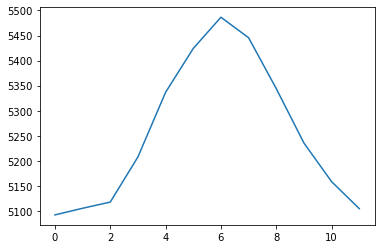

In [30]:
plt.plot(climo_array[:,81,350])
plt.show()

In [31]:
#average all years together (x-axis is each month)
#anom_array should be climo_array
#subtract from geo values
#loop through every month in geo values, need to go by 1d individually (loop thru months)
#match the months fro climo array and geo values
#should be size of geo values 
#anom_geo[:,j,:,:,:] = 5d_geovalues[:,j,:,:,:] - climo_array[j,:,:]
#can reshape back to time, lat ,lon
#makes it easier so the j dim is 12 for both

In [32]:
#You want to make sure that you are subtracting the january climatological value at each grid point from all Januaries in 
#geo_value, and so on

In [33]:
#geo_values=hgt500_array.GEOdaily.values
#np.shape(geo_values)
#len(match_year[0])

In [34]:
#31 represents first month and how many days are in it
#np.shape(geo_values[match_year[0],:,:])

In [35]:
#loop thru climo array and geo values and match month indices 

In [36]:
np.shape(geo_values)

(14975, 91, 360)

In [37]:
np.shape(climo_array)

(12, 91, 360)

In [38]:
anom_array = np.zeros(np.shape(geo_values))
np.shape(anom_array)

(14975, 91, 360)

In [39]:
#month_list

In [40]:
#pear is arange 1-12
for i in range(len(month_list)):
    for j in range(len(pear)):
        if month_list[i] == pear[j]:
            anom_array[i,:,:] = geo_values[i,:,:]- climo_array[j,:,:]

In [41]:
np.shape(anom_array)

(14975, 91, 360)

In [42]:
#np.mean(geo_values[match_year[0],:,:],axis=0)
#len(match_year[0])

In [43]:
#hgt500_anom = hgt500_array-hgt500_array.mean('time_da')
#hgt500_anom

In [44]:
#climo = hgt500_anom.groupby('time_da.month').mean('time_da')
#rmv_climo = hgt500_anom.groupby('time_da.month')-climo
#type(hgt500_array['time_da'])
#rmv_climo = anom_array-climo_array

In [45]:
#spring months idx list to grab the indicies
spring_months_idx=[]
for i in range(len(index)):
    if index[i].month== 3 or index[i].month==4 or index[i].month==5 or index[i].month==6:
        spring_months_idx.append(i)

In [46]:
#spring_months_idx
#len(index)

In [47]:
#spring_months_idx=[]
#for i in range(len(rmv_climo.time_da)):
 #   if rmv_climo.time_da[i].month== 3 or rmv_climo.time_da[i].month==4 or rmv_climo.time_da[i].month==5 or rmv_climo.time_da[i].month==6:
  #      spring_months_idx.append(i)
#spring_months_idx[0:10]

In [48]:
spring_array=np.zeros([len(spring_months_idx),len(lat),len(lon)])
np.shape(spring_array)

(5002, 91, 360)

In [49]:
#spring_months_idx

In [50]:
spring_array=anom_array[spring_months_idx,:,:]

In [51]:
#for i in range(len(spring_months_idx)):
   # if i == 2500:
    #    print('halfway')
 #   spring_array[i,:,:] = rmv_climo.GEOdaily[spring_months_idx[i],:,:].values

In [52]:
np.shape(spring_array)

(5002, 91, 360)

In [53]:
#rmv_climo[spring_months_idx[i],:,:].values
#np.shape(rmv_climo.GEOdaily)

In [54]:
rmm = pd.read_csv('/data/asoria/rmm.csv')
#1/1/1979,12/31/2019
rmm_daily=rmm[1675:16650]
mon = [3,4,5,6]
rmm_daily_spring = rmm_daily[rmm_daily.month.isin(mon)]
np.shape(rmm_daily_spring)

(5002, 12)

In [55]:
phase_spring=rmm_daily_spring['phase']
amp_spring=rmm_daily_spring['amplitude']

In [56]:
strong_amp=spring_array[amp_spring>=1]

In [57]:
#create new hgt500 array
spring_hgt500_array = xr.Dataset({
    'hgt500': xr.DataArray(
                data   = spring_array,
                dims   = ['time_da','lat','lon'],
                coords = {'time_da': spring_months, 'lat': lat, 'lon': lon}),
    'phase': xr.DataArray(
                data   = phase_spring,
                dims   = ['time_da'],
                coords = {'time_da': spring_months}),
    'amplitude': xr.DataArray(
                data   = amp_spring,
                dims   = ['time_da'],
                coords = {'time_da': spring_months})})
spring_hgt500_array

<xarray.Dataset>
Dimensions:    (lat: 91, lon: 360, time_da: 5002)
Coordinates:
  * time_da    (time_da) datetime64[ns] 1979-03-01 1979-03-02 ... 2019-06-30
  * lat        (lat) float32 0.0 1.0 2.0 3.0 4.0 ... 86.0 87.0 88.0 89.0 90.0
  * lon        (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Data variables:
    hgt500     (time_da, lat, lon) float64 -1.35 -2.343 -2.683 ... 251.1 251.1
    phase      (time_da) int64 4 4 4 4 4 4 4 4 4 5 5 5 ... 6 6 6 7 7 7 7 7 7 7 7
    amplitude  (time_da) float64 0.8875 0.8429 1.111 ... 0.999 0.9364 0.9614

In [58]:
hgt500_var = spring_hgt500_array['hgt500']
amp_var=spring_hgt500_array['amplitude']
phase_var=spring_hgt500_array['phase']

In [59]:
#strong counts
hgt500_gt1=hgt500_var[amp_var>=1.0]
np.shape(hgt500_gt1)

(3166, 91, 360)

In [60]:
#strong phase
phase_gt1=phase_var[amp_var>=1.0]

In [61]:
#h
hgt500_gt1_grouped=hgt500_gt1.groupby(phase_gt1).mean()
np.shape(hgt500_gt1_grouped)

(8, 91, 360)

In [62]:
#strong counts mean
#hgt500_gt1_mean = np.mean(hgt500_gt1,axis=0)
#h_Std
hgt500_gt1_grouped_std = hgt500_gt1.groupby(phase_gt1).std()
#hgt500_gt1_std = np.std(hgt500_gt1,axis=0)
np.shape(hgt500_gt1_grouped_std)

(8, 91, 360)

In [63]:
#phase_num = 8
#N = len(phase_gt1[phase_gt1==phase_num])
#sample_mean = hgt500_gt1_mean
#sample_std = hgt500_gt1_grouped_std[phase_num-1,:,:]
#population_mean = 0
#t_score = (sample_mean-population_mean)/(sample_std/(np.sqrt(N-1)))
#df = N-2
#t_crit = stats.t.ppf(0.975,df)
#print(np.shape(t_score))

In [64]:
longitude_mesh, latitude_mesh = np.meshgrid(lon[:],lat[:])
#longitude_mesh, latitude_mesh = np.meshgrid(lon[::10],lat[::10])

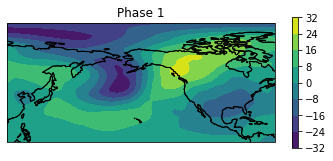

In [65]:
myvar = hgt500_gt1_grouped.sel(phase=1)
mylat = lat
mylon = lon

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')

plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', shrink = 0.6)
ax.coastlines()
ax.set_title('Phase 1')
plt.show()

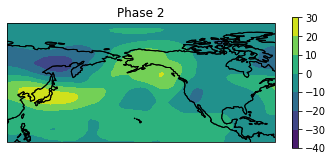

In [66]:
myvar = hgt500_gt1_grouped.sel(phase=2)
mylat = lat
mylon = lon

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')

plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', shrink = 0.6)
ax.coastlines()
ax.set_title('Phase 2')
plt.show()

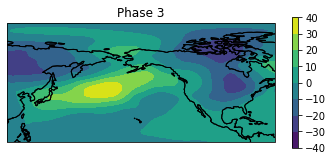

In [67]:
myvar = hgt500_gt1_grouped.sel(phase=3)
mylat = lat
mylon = lon

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')

plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', shrink = 0.6)
ax.coastlines()
ax.set_title('Phase 3')
plt.show()

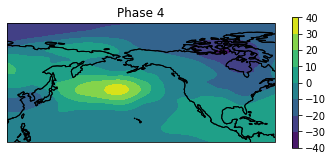

In [68]:
myvar = hgt500_gt1_grouped.sel(phase=4)
mylat = lat
mylon = lon

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')

plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', shrink = 0.6)
ax.coastlines()
ax.set_title('Phase 4')
plt.show()

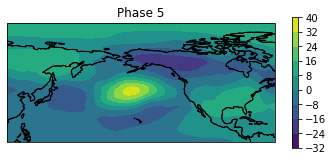

In [69]:
myvar = hgt500_gt1_grouped.sel(phase=5)
mylat = lat
mylon = lon

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')

plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', shrink = 0.6)
ax.coastlines()
ax.set_title('Phase 5')
plt.show()

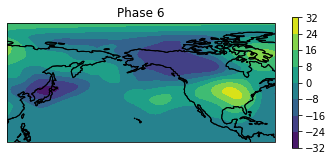

In [70]:
myvar = hgt500_gt1_grouped.sel(phase=6)
mylat = lat
mylon = lon

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')

plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', shrink = 0.6)
ax.coastlines()
ax.set_title('Phase 6')
plt.show()

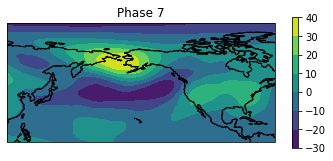

In [71]:
myvar = hgt500_gt1_grouped.sel(phase=7)
mylat = lat
mylon = lon

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')

plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', shrink = 0.6)
ax.coastlines()
ax.set_title('Phase 7')
plt.show()

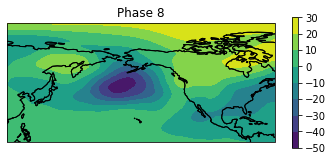

In [72]:
myvar = hgt500_gt1_grouped.sel(phase=8)
mylat = lat
mylon = lon

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')

plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', shrink = 0.6)
ax.coastlines()
ax.set_title('Phase 8')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/data/asoria/TRACK/500mb_composite/phase8.png'

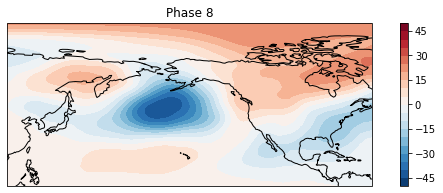

In [73]:
myvar = hgt500_gt1_grouped.sel(phase=8)
mylat = lat
mylon = lon
vmin=-50
vmax=50
f = plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')

ax.set_title('Phase 8')
n =20
levels = np.linspace(vmin, vmax, n+1)
cf = ax.contourf(mylon,mylat,myvar, transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r')
plt.colorbar(cf, shrink=1)
plt.savefig('/data/asoria/TRACK/500mb_composite/phase8.png',dpi=300)

In [ ]:
mylon

In [ ]:
np.shape(stat_lat)

In [ ]:
longitude_mesh.copy()

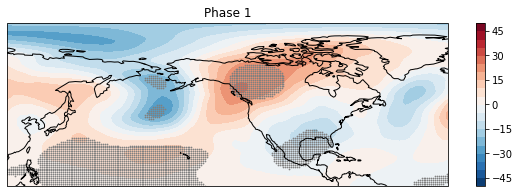

In [74]:
phase_num = 1
N = len(phase_gt1[phase_gt1==phase_num])
sample_mean = hgt500_gt1_grouped[phase_num-1,:,:]
sample_std = hgt500_gt1_grouped_std[phase_num-1,:,:]
population_mean = 0
t_score = sample_mean/(sample_std/(np.sqrt(N/5-1)))
df = N/5-1
t_crit = stats.t.ppf(0.975,df)

#myvar = hgt500_gt1_grouped[phase_num-1,:,:]
myvar = sample_mean
stat_lat = latitude_mesh.copy()
stat_lon = longitude_mesh.copy()

stat_lat[np.abs(t_score)<t_crit]=np.nan
stat_lon[np.abs(t_score)<t_crit]=np.nan

f = plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 340, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-50
vmax=50

n =20
levels = np.linspace(vmin, vmax, n+1)
cf = ax.contourf(mylon,mylat,myvar, transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r')
plt.colorbar(cf, shrink=1)
ax.set_title('Phase '+ str(phase_num))
plt.scatter(stat_lon,stat_lat, transform=ccrs.PlateCarree(), s=2, color='gray',marker='.')
#plt.savefig('/data/asoria/TRACK/Final_figures/500mb_stipple_phase8.png',dpi=300)

In [ ]:
phase_num = 2
N = len(phase_gt1[phase_gt1==phase_num])
sample_mean = hgt500_gt1_grouped[phase_num-1,:,:]
sample_std = hgt500_gt1_grouped_std[phase_num-1,:,:]
population_mean = 0
t_score = sample_mean/(sample_std/(np.sqrt(N/5-1)))
df = N/5-1
t_crit = stats.t.ppf(0.975,df)

#myvar = hgt500_gt1_grouped[phase_num-1,:,:]
myvar = sample_mean
stat_lat = latitude_mesh.copy()
stat_lon = longitude_mesh.copy()

stat_lat[np.abs(t_score)<t_crit]=np.nan
stat_lon[np.abs(t_score)<t_crit]=np.nan

f = plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=360))
ax.set_extent([110, 360, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-50
vmax=50

n =20
levels = np.linspace(vmin, vmax, n+1)
cf = ax.contourf(mylon,mylat,myvar, transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r')
plt.colorbar(cf, shrink=0.7)
ax.set_title('Phase '+ str(phase_num))
plt.scatter(stat_lon,stat_lat, s=2, color='gray',marker='.')
#plt.savefig('/data/asoria/TRACK/500mb_composite/phase8.png',dpi=300)

In [ ]:
phase_num = 3
N = len(phase_gt1[phase_gt1==phase_num])
sample_mean = hgt500_gt1_grouped[phase_num-1,:,:]
sample_std = hgt500_gt1_grouped_std[phase_num-1,:,:]
population_mean = 0
t_score = sample_mean/(sample_std/(np.sqrt(N/5-1)))
df = N/5-1
t_crit = stats.t.ppf(0.975,df)

#myvar = hgt500_gt1_grouped[phase_num-1,:,:]
myvar = sample_mean
stat_lat = latitude_mesh.copy()
stat_lon = longitude_mesh.copy()

stat_lat[np.abs(t_score)<t_crit]=np.nan
stat_lon[np.abs(t_score)<t_crit]=np.nan

f = plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=360))
ax.set_extent([110, 360, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-50
vmax=50

n =20
levels = np.linspace(vmin, vmax, n+1)
cf = ax.contourf(mylon,mylat,myvar, transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r')
plt.colorbar(cf, shrink=0.7)
ax.set_title('Phase '+ str(phase_num))
plt.scatter(stat_lon,stat_lat, s=2, color='gray',marker='.')
#plt.savefig('/data/asoria/TRACK/500mb_composite/phase8.png',dpi=300)

In [ ]:
phase_num = 4
N = len(phase_gt1[phase_gt1==phase_num])
sample_mean = hgt500_gt1_grouped[phase_num-1,:,:]
sample_std = hgt500_gt1_grouped_std[phase_num-1,:,:]
population_mean = 0
t_score = sample_mean/(sample_std/(np.sqrt(N/5-1)))
df = N/5-1
t_crit = stats.t.ppf(0.975,df)

#myvar = hgt500_gt1_grouped[phase_num-1,:,:]
myvar = sample_mean
stat_lat = latitude_mesh.copy()
stat_lon = longitude_mesh.copy()

stat_lat[np.abs(t_score)<t_crit]=np.nan
stat_lon[np.abs(t_score)<t_crit]=np.nan

f = plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=360))
ax.set_extent([110, 360, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-50
vmax=50

n =20
levels = np.linspace(vmin, vmax, n+1)
cf = ax.contourf(mylon,mylat,myvar, transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r')
plt.colorbar(cf, shrink=0.7)
ax.set_title('Phase '+ str(phase_num))
plt.scatter(stat_lon,stat_lat, s=2, color='gray',marker='.')
#plt.savefig('/data/asoria/TRACK/500mb_composite/phase8.png',dpi=300)

In [ ]:
phase_num = 5
N = len(phase_gt1[phase_gt1==phase_num])
sample_mean = hgt500_gt1_grouped[phase_num-1,:,:]
sample_std = hgt500_gt1_grouped_std[phase_num-1,:,:]
population_mean = 0
t_score = sample_mean/(sample_std/(np.sqrt(N/5-1)))
df = N/5-1
t_crit = stats.t.ppf(0.975,df)

#myvar = hgt500_gt1_grouped[phase_num-1,:,:]
myvar = sample_mean
stat_lat = latitude_mesh.copy()
stat_lon = longitude_mesh.copy()

stat_lat[np.abs(t_score)<t_crit]=np.nan
stat_lon[np.abs(t_score)<t_crit]=np.nan

f = plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=360))
ax.set_extent([110, 360, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-50
vmax=50

n =20
levels = np.linspace(vmin, vmax, n+1)
cf = ax.contourf(mylon,mylat,myvar, transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r')
plt.colorbar(cf, shrink=0.7)
ax.set_title('Phase '+ str(phase_num))
plt.scatter(stat_lon,stat_lat, s=2, color='gray',marker='.')
#plt.savefig('/data/asoria/TRACK/500mb_composite/phase8.png',dpi=300)

In [ ]:
phase_num = 6
N = len(phase_gt1[phase_gt1==phase_num])
sample_mean = hgt500_gt1_grouped[phase_num-1,:,:]
sample_std = hgt500_gt1_grouped_std[phase_num-1,:,:]
population_mean = 0
t_score = sample_mean/(sample_std/(np.sqrt(N/5-1)))
df = N/5-1
t_crit = stats.t.ppf(0.975,df)

#myvar = hgt500_gt1_grouped[phase_num-1,:,:]
myvar = sample_mean
stat_lat = latitude_mesh.copy()
stat_lon = longitude_mesh.copy()

stat_lat[np.abs(t_score)<t_crit]=np.nan
stat_lon[np.abs(t_score)<t_crit]=np.nan

f = plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=360))
ax.set_extent([110, 360, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-50
vmax=50

n =20
levels = np.linspace(vmin, vmax, n+1)
cf = ax.contourf(mylon,mylat,myvar, transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r')
plt.colorbar(cf, shrink=0.7)
ax.set_title('Phase '+ str(phase_num))
plt.scatter(stat_lon,stat_lat, s=2, color='gray',marker='.')
#plt.savefig('/data/asoria/TRACK/500mb_composite/phase8.png',dpi=300)

In [ ]:
phase_num = 7
N = len(phase_gt1[phase_gt1==phase_num])
sample_mean = hgt500_gt1_grouped[phase_num-1,:,:]
sample_std = hgt500_gt1_grouped_std[phase_num-1,:,:]
population_mean = 0
t_score = sample_mean/(sample_std/(np.sqrt(N/5-1)))
df = N/5-1
t_crit = stats.t.ppf(0.975,df)

#myvar = hgt500_gt1_grouped[phase_num-1,:,:]
myvar = sample_mean
stat_lat = latitude_mesh.copy()
stat_lon = longitude_mesh.copy()

stat_lat[np.abs(t_score)<t_crit]=np.nan
stat_lon[np.abs(t_score)<t_crit]=np.nan

f = plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=360))
ax.set_extent([110, 360, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-50
vmax=50

n =20
levels = np.linspace(vmin, vmax, n+1)
cf = ax.contourf(mylon,mylat,myvar, transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r')
plt.colorbar(cf, shrink=0.7)
ax.set_title('Phase '+ str(phase_num))
plt.scatter(stat_lon,stat_lat, s=2, color='gray',marker='.')
#plt.savefig('/data/asoria/TRACK/500mb_composite/phase8.png',dpi=300)

In [ ]:
phase_num = 8
N = len(phase_gt1[phase_gt1==phase_num])
sample_mean = hgt500_gt1_grouped[phase_num-1,:,:]
sample_std = hgt500_gt1_grouped_std[phase_num-1,:,:]
population_mean = 0
t_score = sample_mean/(sample_std/(np.sqrt(N/5-1)))
df = N/5-1
t_crit = stats.t.ppf(0.975,df)

#myvar = hgt500_gt1_grouped[phase_num-1,:,:]
myvar = sample_mean
stat_lat = latitude_mesh.copy()
stat_lon = longitude_mesh.copy()

stat_lat[np.abs(t_score)<t_crit]=np.nan
stat_lon[np.abs(t_score)<t_crit]=np.nan

f = plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=360))
ax.set_extent([110, 360, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-50
vmax=50

n =20
levels = np.linspace(vmin, vmax, n+1)
cf = ax.contourf(mylon,mylat,myvar, transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r')
plt.colorbar(cf, shrink=0.7)
ax.set_title('Phase '+ str(phase_num))
plt.scatter(stat_lon,stat_lat, s=2, color='gray',marker='.')
#plt.savefig('/data/asoria/TRACK/500mb_composite/phase8.png',dpi=300)